In [6]:
import os
os.system('clear')

import numpy as np
import pandas as pd
import datetime

from termcolor import colored
from SecretColors.palette import Palette
material = Palette("material", color_mode = 'hexa')

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])

# os.chdir("./nordpool")

In [7]:
flist = [f for f in sorted(os.listdir("./raw")) if not f.startswith('.') or f.startswith('~')]

print(flist)

for filename in flist:
    print(filename)
    y = int(filename[:4])
    print(y)
    if y == 2019:
        df = pd.read_excel(f"./raw/{filename}", header = None, skip_blank_lines=True, decimal=',', thousands='.')
        df = df.replace('Instrument code', 'Instrumentcode')
        df = df.replace('Contract type', 'Contracttype')
        df = df.dropna(how = 'all', axis = 0)
        df = df.dropna(how = 'all', axis = 1)
        df = df.reset_index(drop = True)
        
        df.columns = df.iloc[0]
        df = df.drop(0)

        df1 = df[~df['Instrumentcode'].str.contains('NL ID ')]
        df2 = df[df['Instrumentcode'].str.contains('NL ID ')]

        df1['Date'] = pd.to_datetime(df1['Instrumentcode'].str[:7], format = '%d%b%y')
        df2['Date'] = pd.to_datetime(df2['Instrumentcode'].str.replace("NL ID ", "").str[:7], format = '%y%b%d')
        df = pd.concat([df1, df2]).sort_index()

        df = df[df['Date'].dt.year == y]

        df['Time'] = (df['Instrumentcode'].str[-2:].astype('int64') - 1).astype('str')
        df['Date'] = pd.to_datetime(df['Date'].dt.strftime("%Y-%m-%d") + ' ' + df['Time'].astype(str) + ':00:00')

        df['Price'] = df['Price'].astype('int64')
        df['Volume'] = df['Volume'].astype('int64')

        df.to_pickle(f"./{os.path.splitext(filename)[0]}.pkl")

['2006_Intraday.xls', '2007_Intraday.xls', '2008_Intraday.xls', '2009_Intraday.xls', '2010_Intraday.xls', '2011_Intraday.xls', '2012_Intraday.xls', '2013_Intraday.xls', '2014_Intraday.xlsx', '2015_Intraday.xlsx', '2016_Intraday.xlsx', '2017_Intraday.xlsx', '2018_Intraday.xlsx', '2019_Intraday.xlsx', '~$2019_Intraday.xlsx']
2006_Intraday.xls
2006
2007_Intraday.xls
2007
2008_Intraday.xls
2008
2009_Intraday.xls
2009
2010_Intraday.xls
2010
2011_Intraday.xls
2011
2012_Intraday.xls
2012
2013_Intraday.xls
2013
2014_Intraday.xlsx
2014
2015_Intraday.xlsx
2015
2016_Intraday.xlsx
2016
2017_Intraday.xlsx
2017
2018_Intraday.xlsx
2018
2019_Intraday.xlsx
2019
~$2019_Intraday.xlsx


ValueError: invalid literal for int() with base 10: '~$20'

0                        Price     Volume               Date
Date Date Date Date                                         
2019 1    1    0     80.557377   7.836066    (2019, 1, 1, 0)
               1     56.055556  17.583333    (2019, 1, 1, 1)
               2     47.088889  10.400000    (2019, 1, 1, 2)
               3     46.533333   8.766667    (2019, 1, 1, 3)
               4     40.204819   7.566265    (2019, 1, 1, 4)
...                        ...        ...                ...
     7    10   18    34.000000   0.000000  (2019, 7, 10, 18)
               19    34.000000   0.000000  (2019, 7, 10, 19)
               20    34.000000   0.000000  (2019, 7, 10, 20)
               21    34.000000   0.000000  (2019, 7, 10, 21)
               22    34.000000   0.000000  (2019, 7, 10, 22)

[4578 rows x 3 columns]

...

Year: 2019

Price: 44130106 Euro
Volume: 5131188 MWh



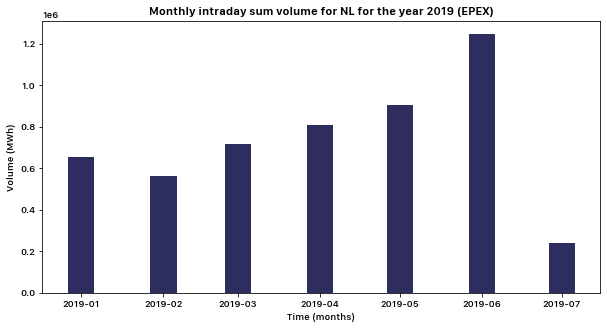

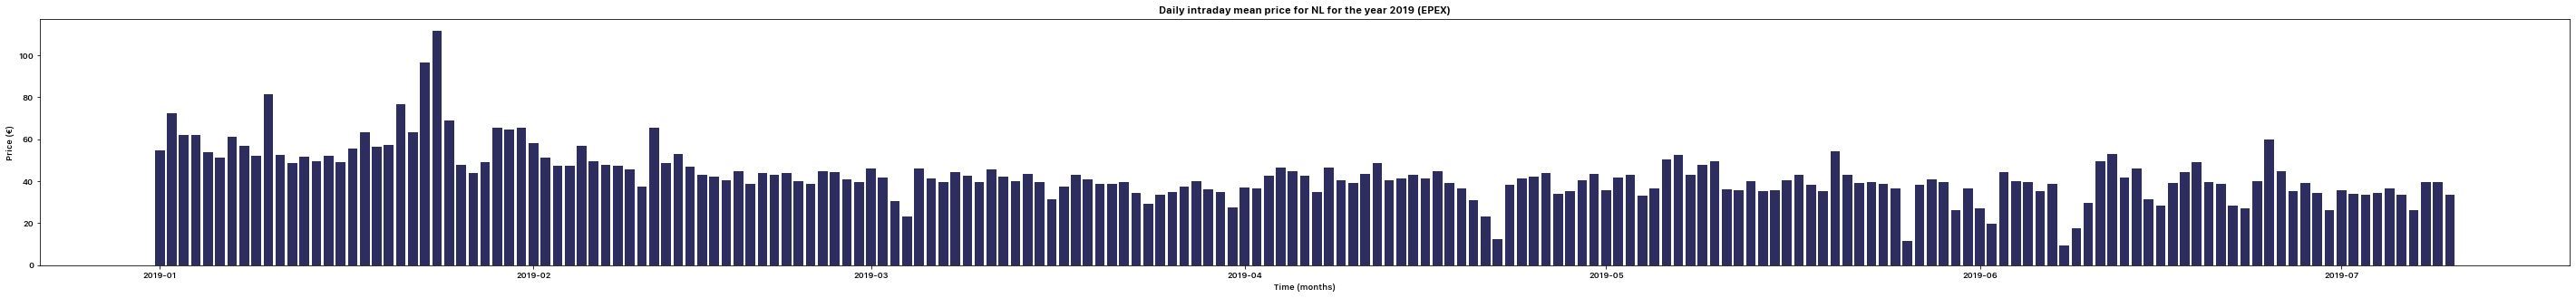


...

Period: 2019–2019
Price: 44130106 Euro
Volume: 5131188 MWh

...



In [9]:
years = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
years = ['2019']
country = 'NL'

dfo = pd.DataFrame()
dfo2 = pd.DataFrame()
price = []
volume = []
breaks = []

for y in years:
    i = years.index(y)

    df = pd.read_pickle(f"./{y}_Intraday.pkl")

    df['Price'] = df['Price'].astype('int64')
    df['Volume'] = df['Volume'].astype('int64')
    # print(type(df['Date']))

    # print(df['Instrumentcode'].str[-2:])
    
    
    # df['Time'] = (df['Instrumentcode'].str[-2:].astype('int64') - 1).astype('str')
    # print(df['Time'])
    # df['Date'] = pd.to_datetime(df['Date'].dt.strftime("%Y-%m-%d") + ' ' + df['Time'].astype(str) + ':00:00')
    # print(df['Date'])
    
    # df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    # df['Date'] = pd.Timestamp.combine['Date','Time']
    
    # print(str(df['Time']))
    # print(df['Date'])
    # df['Date'] = df['Date'].replace(hour=(df['Instrumentcode'].str[-2:-1]).astype('int64') - 1)
    # df['Date'] = df['Date'].apply(lambda t: t.replace(hour=(df['Instrumentcode'].str[-2:-1]).astype('int64') - 1))
    
    # df['Date'] = df['Date'] + datetime.timedelta(hours=(df['Instrumentcode'].str[-2:-1]).astype('int64') - 1)
    
    
    #  = pd.to_datetime(df['Instrumentcode'].str.replace("NL ID ", ""), format = '%y%b%d - 1H-%H')
    # print(df)

    volume_buy = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'buy', 'Volume'].sum()
    volume_sell = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'sell', 'Volume'].sum()

    price_buy = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'buy', 'Price'].sum()
    price_sell = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'sell', 'Price'].sum()

    df_group = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum()
    df_group['Date'] = df_group.index
    df_group['Date'] = pd.to_datetime(df_group['Date'], format='(%Y, %m)')

    df_group2 = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day)]).mean()
    df_group2['Date'] = df_group2.index
    df_group2['Date'] = pd.to_datetime(df_group2['Date'], format='(%Y, %m, %d)')

    df_group3 = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day), (df['Date'].dt.hour)]).mean()
    df_group3['Date'] = df_group3.index
    print(df_group3)
    # df_group3['Date'] = pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d)')

    df_group = df_group.set_index(pd.DatetimeIndex(df_group['Date']))
    df_group2 = df_group2.set_index(pd.DatetimeIndex(df_group2['Date']))

    dfo = dfo.append(df_group, ignore_index = False)
    dfo2 = dfo2.append(df, ignore_index = False)
    breaks.append(len(dfo))

    price.append(df['Price'].sum())
    volume.append(df['Volume'].sum())
    
    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored(f'Price: {int(round(price[i]))} Euro', 'blue'))
    print(colored(f'Volume: {int(round(volume[i]))} MWh', 'blue'))
    print('')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(df_group['Date'], df_group['Volume'], width=10)
    ax.set_title(f'Monthly intraday sum volume for {country} for the year {y} (EPEX)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Volume (MWh)')
    plt.show()

    fig, ax = plt.subplots(figsize=(50, 5))
    ax.bar(df_group2['Date'], df_group2['Price'])
    ax.set_title(f'Daily intraday mean price for {country} for the year {y} (EPEX)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Price (€)')
    plt.show()

print('')
print(colored('...','white'))
print('')
print(colored(f'Period: {years[0]}–{years[-1]}', 'blue'))
print(colored(f'Price: {int(round(sum(price)))} Euro', 'blue'))
print(colored(f'Volume: {int(round(sum(volume)))} MWh', 'blue'))
print('')
print(colored('...','white'))
print('')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(dfo['Date'], dfo['Volume'], width=20)
ax.set_title(f'Monthly intraday volume for {country} for the period {years[0]}–{years[-1]} (EPEX)')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Volume (MWh)')